In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
# 在jupyter-notebook显示图像
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/hailin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hailin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hailin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hailin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
df = pd.read_csv('/home/hailin/Downloads/data(conv).csv')  # 注意文件位置
df = np.array(df)
print(df.shape)

(32831, 60)


In [3]:
input_data = []
label_data = []
test_input_data = []
test_label_data = []
for n in range(29547): # 总数据的90%用来训练和验证，剩余10%test
    input_data.append(df[n, 2:60])
    label_data.append(df[n+1, 2])
    
for m in range(29547,32830): # test_data
    test_input_data.append(df[m, 2:60])
    test_label_data.append(df[m+1, 2])
    
# data转型
input_data = np.array(input_data)
label_data = np.array(label_data)
test_input_data = np.array(test_input_data)
test_label_data = np.array(test_label_data)

input_data = input_data.astype(np.float32)
label_data = label_data.astype(np.float32)
test_input_data = test_input_data.astype(np.float32)
test_label_data = test_label_data.astype(np.float32)

label_data = label_data.reshape(-1, 1)
test_label_data = test_label_data.reshape(-1, 1)

# 归一化处理
scaler = MinMaxScaler(feature_range=(0, 1))
input_data = scaler.fit_transform(input_data)
label_data = scaler.fit_transform(label_data)
test_input_data = scaler.fit_transform(test_input_data)
test_label_data = scaler.fit_transform(test_label_data)

In [4]:
input_data = input_data.reshape(-1, 1, 58)
label_data = label_data.reshape(-1, 1)
test_input_data = test_input_data.reshape(-1, 1, 58)
test_label_data = test_label_data.reshape(-1, 1)

In [5]:
print(input_data.shape)
print(label_data.shape)
print(test_input_data.shape)
print(test_label_data.shape)


(29547, 1, 58)
(29547, 1)
(3283, 1, 58)
(3283, 1)


In [7]:
# conv1d预测模型
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv1D(64, 3, padding='same', input_shape=(1, 58), activation='relu'),
    tf.keras.layers.MaxPooling1D(2, padding='same'),
    
    tf.keras.layers.Conv1D(128, 3, padding='same', input_shape=(1, 58), activation='relu'),
    tf.keras.layers.MaxPooling1D(2, padding='same'),
    
    tf.keras.layers.Conv1D(256, 3, padding='same', input_shape=(1, 58), activation='relu'),
    tf.keras.layers.MaxPooling1D(2, padding='same'),
    
    tf.keras.layers.LSTM(4),

    tf.keras.layers.Dense(1, activation='tanh')

])

model.compile(optimizer='adam', loss='mape', metrics=['mse','mae'])
model.summary()
model.fit(input_data, label_data, validation_split=0.3, epochs=2000)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1, 64)             11200     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1, 128)            24704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1, 256)            98560     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                

20682/20682 [==============================] - 2s 93us/sample - loss: 3.0361 - mean_squared_error: 1.8240e-04 - mean_absolute_error: 0.0099 - val_loss: 2145.3592 - val_mean_squared_error: 2.0277e-04 - val_mean_absolute_error: 0.0108
Epoch 62/2000
20682/20682 [==============================] - 2s 93us/sample - loss: 2.9546 - mean_squared_error: 1.7486e-04 - mean_absolute_error: 0.0097 - val_loss: 2494.0706 - val_mean_squared_error: 1.5117e-04 - val_mean_absolute_error: 0.0088
Epoch 63/2000
20682/20682 [==============================] - 2s 92us/sample - loss: 3.0412 - mean_squared_error: 1.8174e-04 - mean_absolute_error: 0.0099 - val_loss: 3657.4423 - val_mean_squared_error: 3.3241e-04 - val_mean_absolute_error: 0.0148
Epoch 64/2000
20682/20682 [==============================] - 2s 93us/sample - loss: 3.0365 - mean_squared_error: 1.8087e-04 - mean_absolute_error: 0.0099 - val_loss: 3172.9101 - val_mean_squared_error: 3.3275e-04 - val_mean_absolute_error: 0.0143
Epoch 65/2000
20682/20682 

20682/20682 [==============================] - 2s 96us/sample - loss: 2.6603 - mean_squared_error: 1.4577e-04 - mean_absolute_error: 0.0088 - val_loss: 2498.8384 - val_mean_squared_error: 1.8777e-04 - val_mean_absolute_error: 0.0101
Epoch 128/2000
20682/20682 [==============================] - 2s 96us/sample - loss: 2.7359 - mean_squared_error: 1.5109e-04 - mean_absolute_error: 0.0090 - val_loss: 2236.0438 - val_mean_squared_error: 1.4866e-04 - val_mean_absolute_error: 0.0088
Epoch 129/2000
20682/20682 [==============================] - 2s 97us/sample - loss: 2.6926 - mean_squared_error: 1.4680e-04 - mean_absolute_error: 0.0089 - val_loss: 2510.1827 - val_mean_squared_error: 2.4071e-04 - val_mean_absolute_error: 0.0116
Epoch 130/2000
20682/20682 [==============================] - 2s 116us/sample - loss: 2.6717 - mean_squared_error: 1.4281e-04 - mean_absolute_error: 0.0088 - val_loss: 2122.9162 - val_mean_squared_error: 1.6515e-04 - val_mean_absolute_error: 0.0092
Epoch 131/2000
20682/2

20682/20682 [==============================] - 2s 95us/sample - loss: 2.6039 - mean_squared_error: 1.3643e-04 - mean_absolute_error: 0.0085 - val_loss: 2223.9888 - val_mean_squared_error: 1.3274e-04 - val_mean_absolute_error: 0.0084
Epoch 194/2000
20682/20682 [==============================] - 2s 96us/sample - loss: 2.5023 - mean_squared_error: 1.2842e-04 - mean_absolute_error: 0.0082 - val_loss: 3030.1831 - val_mean_squared_error: 1.3251e-04 - val_mean_absolute_error: 0.0084
Epoch 195/2000
20682/20682 [==============================] - 2s 96us/sample - loss: 2.5817 - mean_squared_error: 1.3499e-04 - mean_absolute_error: 0.0085 - val_loss: 2402.5204 - val_mean_squared_error: 1.3505e-04 - val_mean_absolute_error: 0.0085
Epoch 196/2000
20682/20682 [==============================] - 2s 96us/sample - loss: 2.5165 - mean_squared_error: 1.3093e-04 - mean_absolute_error: 0.0083 - val_loss: 2630.7171 - val_mean_squared_error: 1.5407e-04 - val_mean_absolute_error: 0.0092
Epoch 197/2000
20682/20

20682/20682 [==============================] - 2s 95us/sample - loss: 2.3758 - mean_squared_error: 1.1763e-04 - mean_absolute_error: 0.0079 - val_loss: 2751.9815 - val_mean_squared_error: 1.2856e-04 - val_mean_absolute_error: 0.0081
Epoch 260/2000
20682/20682 [==============================] - 2s 101us/sample - loss: 2.4042 - mean_squared_error: 1.2001e-04 - mean_absolute_error: 0.0079 - val_loss: 2815.1508 - val_mean_squared_error: 1.7548e-04 - val_mean_absolute_error: 0.0100
Epoch 261/2000
20682/20682 [==============================] - 2s 105us/sample - loss: 2.3782 - mean_squared_error: 1.1603e-04 - mean_absolute_error: 0.0078 - val_loss: 2097.8209 - val_mean_squared_error: 1.5919e-04 - val_mean_absolute_error: 0.0090
Epoch 262/2000
20682/20682 [==============================] - 2s 100us/sample - loss: 2.4217 - mean_squared_error: 1.1942e-04 - mean_absolute_error: 0.0080 - val_loss: 3168.2661 - val_mean_squared_error: 1.5287e-04 - val_mean_absolute_error: 0.0090
Epoch 263/2000
20682

20682/20682 [==============================] - 2s 94us/sample - loss: 2.3961 - mean_squared_error: 1.1724e-04 - mean_absolute_error: 0.0079 - val_loss: 2814.9551 - val_mean_squared_error: 1.6253e-04 - val_mean_absolute_error: 0.0094
Epoch 293/2000
20682/20682 [==============================] - 2s 94us/sample - loss: 2.3463 - mean_squared_error: 1.1164e-04 - mean_absolute_error: 0.0077 - val_loss: 2351.8792 - val_mean_squared_error: 1.5842e-04 - val_mean_absolute_error: 0.0091
Epoch 294/2000
20682/20682 [==============================] - 2s 94us/sample - loss: 2.3965 - mean_squared_error: 1.1724e-04 - mean_absolute_error: 0.0079 - val_loss: 2316.2141 - val_mean_squared_error: 1.3876e-04 - val_mean_absolute_error: 0.0084
Epoch 295/2000
20682/20682 [==============================] - 2s 94us/sample - loss: 2.3581 - mean_squared_error: 1.1503e-04 - mean_absolute_error: 0.0078 - val_loss: 2315.9792 - val_mean_squared_error: 1.2965e-04 - val_mean_absolute_error: 0.0083
Epoch 296/2000
20682/20

20682/20682 [==============================] - 2s 106us/sample - loss: 2.3037 - mean_squared_error: 1.0902e-04 - mean_absolute_error: 0.0076 - val_loss: 2278.7290 - val_mean_squared_error: 1.4149e-04 - val_mean_absolute_error: 0.0086
Epoch 326/2000
20682/20682 [==============================] - 2s 97us/sample - loss: 2.3262 - mean_squared_error: 1.1111e-04 - mean_absolute_error: 0.0077 - val_loss: 2743.5022 - val_mean_squared_error: 1.9815e-04 - val_mean_absolute_error: 0.0104
Epoch 327/2000
20682/20682 [==============================] - 2s 96us/sample - loss: 2.3972 - mean_squared_error: 1.1784e-04 - mean_absolute_error: 0.0079 - val_loss: 2565.2720 - val_mean_squared_error: 1.3417e-04 - val_mean_absolute_error: 0.0085
Epoch 328/2000
20682/20682 [==============================] - 3s 129us/sample - loss: 2.3825 - mean_squared_error: 1.1624e-04 - mean_absolute_error: 0.0079 - val_loss: 2644.3554 - val_mean_squared_error: 1.4265e-04 - val_mean_absolute_error: 0.0085
Epoch 329/2000
20682/

Epoch 358/2000
20682/20682 [==============================] - 3s 164us/sample - loss: 2.3126 - mean_squared_error: 1.1057e-04 - mean_absolute_error: 0.0076 - val_loss: 2905.3837 - val_mean_squared_error: 1.4279e-04 - val_mean_absolute_error: 0.0088
Epoch 359/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.3129 - mean_squared_error: 1.0970e-04 - mean_absolute_error: 0.0076 - val_loss: 2330.5850 - val_mean_squared_error: 1.4585e-04 - val_mean_absolute_error: 0.0087
Epoch 360/2000
20682/20682 [==============================] - 3s 164us/sample - loss: 2.3035 - mean_squared_error: 1.0977e-04 - mean_absolute_error: 0.0076 - val_loss: 2919.8812 - val_mean_squared_error: 1.3331e-04 - val_mean_absolute_error: 0.0083
Epoch 361/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.2959 - mean_squared_error: 1.0970e-04 - mean_absolute_error: 0.0076 - val_loss: 2741.3401 - val_mean_squared_error: 1.3545e-04 - val_mean_absolute_error: 0.0084
Epoc

Epoch 391/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.2848 - mean_squared_error: 1.0737e-04 - mean_absolute_error: 0.0075 - val_loss: 2971.4163 - val_mean_squared_error: 1.3639e-04 - val_mean_absolute_error: 0.0086
Epoch 392/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.2905 - mean_squared_error: 1.0694e-04 - mean_absolute_error: 0.0075 - val_loss: 2993.2565 - val_mean_squared_error: 1.7523e-04 - val_mean_absolute_error: 0.0095
Epoch 393/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.2889 - mean_squared_error: 1.1039e-04 - mean_absolute_error: 0.0076 - val_loss: 2657.5264 - val_mean_squared_error: 1.3784e-04 - val_mean_absolute_error: 0.0085
Epoch 394/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.3061 - mean_squared_error: 1.0889e-04 - mean_absolute_error: 0.0076 - val_loss: 3321.5776 - val_mean_squared_error: 1.6638e-04 - val_mean_absolute_error: 0.0093
Epoc

Epoch 424/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 2.2676 - mean_squared_error: 1.0639e-04 - mean_absolute_error: 0.0075 - val_loss: 2782.8061 - val_mean_squared_error: 1.3082e-04 - val_mean_absolute_error: 0.0083
Epoch 425/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.3172 - mean_squared_error: 1.1193e-04 - mean_absolute_error: 0.0077 - val_loss: 2473.2154 - val_mean_squared_error: 2.0933e-04 - val_mean_absolute_error: 0.0115
Epoch 426/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 2.2742 - mean_squared_error: 1.0742e-04 - mean_absolute_error: 0.0075 - val_loss: 2797.9248 - val_mean_squared_error: 1.3787e-04 - val_mean_absolute_error: 0.0084
Epoch 427/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 2.2353 - mean_squared_error: 1.0460e-04 - mean_absolute_error: 0.0074 - val_loss: 2545.4347 - val_mean_squared_error: 1.2703e-04 - val_mean_absolute_error: 0.0082
Epoc

Epoch 457/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 2.2159 - mean_squared_error: 1.0375e-04 - mean_absolute_error: 0.0073 - val_loss: 2545.6525 - val_mean_squared_error: 1.4271e-04 - val_mean_absolute_error: 0.0086
Epoch 458/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 2.2087 - mean_squared_error: 1.0341e-04 - mean_absolute_error: 0.0073 - val_loss: 2951.5127 - val_mean_squared_error: 1.5147e-04 - val_mean_absolute_error: 0.0090
Epoch 459/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.2431 - mean_squared_error: 1.0479e-04 - mean_absolute_error: 0.0074 - val_loss: 2939.4374 - val_mean_squared_error: 1.3703e-04 - val_mean_absolute_error: 0.0085
Epoch 460/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 2.2863 - mean_squared_error: 1.1035e-04 - mean_absolute_error: 0.0076 - val_loss: 2829.4803 - val_mean_squared_error: 1.3866e-04 - val_mean_absolute_error: 0.0085
Epoc

Epoch 490/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 2.2070 - mean_squared_error: 1.0335e-04 - mean_absolute_error: 0.0073 - val_loss: 3093.7933 - val_mean_squared_error: 1.4759e-04 - val_mean_absolute_error: 0.0091
Epoch 491/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 2.2595 - mean_squared_error: 1.0691e-04 - mean_absolute_error: 0.0075 - val_loss: 2614.3991 - val_mean_squared_error: 1.3775e-04 - val_mean_absolute_error: 0.0086
Epoch 492/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 2.1931 - mean_squared_error: 1.0121e-04 - mean_absolute_error: 0.0073 - val_loss: 2474.6052 - val_mean_squared_error: 1.3929e-04 - val_mean_absolute_error: 0.0085
Epoch 493/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.1889 - mean_squared_error: 1.0179e-04 - mean_absolute_error: 0.0072 - val_loss: 2304.4170 - val_mean_squared_error: 1.3090e-04 - val_mean_absolute_error: 0.0083
Epoc

Epoch 523/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.2015 - mean_squared_error: 1.0376e-04 - mean_absolute_error: 0.0073 - val_loss: 2748.8201 - val_mean_squared_error: 1.4074e-04 - val_mean_absolute_error: 0.0089
Epoch 524/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.1655 - mean_squared_error: 1.0016e-04 - mean_absolute_error: 0.0072 - val_loss: 2860.8139 - val_mean_squared_error: 1.4192e-04 - val_mean_absolute_error: 0.0088
Epoch 525/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.1841 - mean_squared_error: 1.0095e-04 - mean_absolute_error: 0.0072 - val_loss: 3089.9737 - val_mean_squared_error: 1.3297e-04 - val_mean_absolute_error: 0.0083
Epoch 526/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.1991 - mean_squared_error: 1.0226e-04 - mean_absolute_error: 0.0073 - val_loss: 2776.1430 - val_mean_squared_error: 1.3674e-04 - val_mean_absolute_error: 0.0085
Epoc

Epoch 556/2000
20682/20682 [==============================] - 4s 176us/sample - loss: 2.1689 - mean_squared_error: 1.0015e-04 - mean_absolute_error: 0.0072 - val_loss: 2840.5040 - val_mean_squared_error: 1.3680e-04 - val_mean_absolute_error: 0.0085
Epoch 557/2000
20682/20682 [==============================] - 3s 163us/sample - loss: 2.1772 - mean_squared_error: 1.0139e-04 - mean_absolute_error: 0.0072 - val_loss: 2709.4412 - val_mean_squared_error: 1.4435e-04 - val_mean_absolute_error: 0.0086
Epoch 558/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.1570 - mean_squared_error: 9.9826e-05 - mean_absolute_error: 0.0072 - val_loss: 2679.2006 - val_mean_squared_error: 1.3663e-04 - val_mean_absolute_error: 0.0086
Epoch 559/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 2.2233 - mean_squared_error: 1.0488e-04 - mean_absolute_error: 0.0074 - val_loss: 2760.9687 - val_mean_squared_error: 1.4519e-04 - val_mean_absolute_error: 0.0087
Epoc

Epoch 589/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.1487 - mean_squared_error: 9.8512e-05 - mean_absolute_error: 0.0071 - val_loss: 2160.4370 - val_mean_squared_error: 1.3840e-04 - val_mean_absolute_error: 0.0085
Epoch 590/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 2.1907 - mean_squared_error: 1.0055e-04 - mean_absolute_error: 0.0072 - val_loss: 2524.8244 - val_mean_squared_error: 2.1029e-04 - val_mean_absolute_error: 0.0114
Epoch 591/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.1548 - mean_squared_error: 9.8940e-05 - mean_absolute_error: 0.0072 - val_loss: 2560.2885 - val_mean_squared_error: 1.3295e-04 - val_mean_absolute_error: 0.0083
Epoch 592/2000
20682/20682 [==============================] - 3s 149us/sample - loss: 2.1765 - mean_squared_error: 1.0037e-04 - mean_absolute_error: 0.0072 - val_loss: 2677.9982 - val_mean_squared_error: 1.4466e-04 - val_mean_absolute_error: 0.0088
Epoc

Epoch 622/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 2.1321 - mean_squared_error: 9.7493e-05 - mean_absolute_error: 0.0071 - val_loss: 2721.2956 - val_mean_squared_error: 1.6896e-04 - val_mean_absolute_error: 0.0099
Epoch 623/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.1593 - mean_squared_error: 9.9204e-05 - mean_absolute_error: 0.0072 - val_loss: 2186.8731 - val_mean_squared_error: 1.3299e-04 - val_mean_absolute_error: 0.0083
Epoch 624/2000
20682/20682 [==============================] - 3s 161us/sample - loss: 2.1516 - mean_squared_error: 9.8553e-05 - mean_absolute_error: 0.0072 - val_loss: 2718.9598 - val_mean_squared_error: 1.4457e-04 - val_mean_absolute_error: 0.0087
Epoch 625/2000
20682/20682 [==============================] - 4s 184us/sample - loss: 2.1353 - mean_squared_error: 9.7336e-05 - mean_absolute_error: 0.0071 - val_loss: 2817.6430 - val_mean_squared_error: 1.2870e-04 - val_mean_absolute_error: 0.0082
Epoc

Epoch 655/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.1258 - mean_squared_error: 9.7834e-05 - mean_absolute_error: 0.0071 - val_loss: 2821.0563 - val_mean_squared_error: 1.3417e-04 - val_mean_absolute_error: 0.0083
Epoch 656/2000
20682/20682 [==============================] - 4s 173us/sample - loss: 2.1550 - mean_squared_error: 9.9217e-05 - mean_absolute_error: 0.0072 - val_loss: 2098.3822 - val_mean_squared_error: 1.3385e-04 - val_mean_absolute_error: 0.0084
Epoch 657/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.1215 - mean_squared_error: 9.6659e-05 - mean_absolute_error: 0.0071 - val_loss: 1958.3089 - val_mean_squared_error: 1.3664e-04 - val_mean_absolute_error: 0.0085
Epoch 658/2000
20682/20682 [==============================] - 3s 161us/sample - loss: 2.1088 - mean_squared_error: 9.6975e-05 - mean_absolute_error: 0.0070 - val_loss: 2529.1994 - val_mean_squared_error: 1.3777e-04 - val_mean_absolute_error: 0.0085
Epoc

Epoch 688/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 2.1130 - mean_squared_error: 9.6351e-05 - mean_absolute_error: 0.0070 - val_loss: 2695.7965 - val_mean_squared_error: 1.3360e-04 - val_mean_absolute_error: 0.0083
Epoch 689/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 2.1295 - mean_squared_error: 9.9066e-05 - mean_absolute_error: 0.0071 - val_loss: 2829.4728 - val_mean_squared_error: 1.3779e-04 - val_mean_absolute_error: 0.0084
Epoch 690/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.1018 - mean_squared_error: 9.5820e-05 - mean_absolute_error: 0.0070 - val_loss: 2662.2520 - val_mean_squared_error: 1.4439e-04 - val_mean_absolute_error: 0.0089
Epoch 691/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 2.1282 - mean_squared_error: 9.7327e-05 - mean_absolute_error: 0.0071 - val_loss: 2737.5085 - val_mean_squared_error: 1.3307e-04 - val_mean_absolute_error: 0.0083
Epoc

Epoch 721/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 2.1108 - mean_squared_error: 9.7113e-05 - mean_absolute_error: 0.0070 - val_loss: 2595.4977 - val_mean_squared_error: 1.3261e-04 - val_mean_absolute_error: 0.0083
Epoch 722/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.1351 - mean_squared_error: 9.8024e-05 - mean_absolute_error: 0.0071 - val_loss: 2895.5924 - val_mean_squared_error: 1.4305e-04 - val_mean_absolute_error: 0.0088
Epoch 723/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.0925 - mean_squared_error: 9.4555e-05 - mean_absolute_error: 0.0070 - val_loss: 2941.9738 - val_mean_squared_error: 1.3800e-04 - val_mean_absolute_error: 0.0086
Epoch 724/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 2.1201 - mean_squared_error: 9.7996e-05 - mean_absolute_error: 0.0071 - val_loss: 3005.7111 - val_mean_squared_error: 1.2694e-04 - val_mean_absolute_error: 0.0082
Epoc

Epoch 754/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 2.1219 - mean_squared_error: 9.7298e-05 - mean_absolute_error: 0.0071 - val_loss: 3077.4592 - val_mean_squared_error: 1.4837e-04 - val_mean_absolute_error: 0.0089
Epoch 755/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0891 - mean_squared_error: 9.3922e-05 - mean_absolute_error: 0.0070 - val_loss: 2925.7586 - val_mean_squared_error: 1.5295e-04 - val_mean_absolute_error: 0.0092
Epoch 756/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0986 - mean_squared_error: 9.5296e-05 - mean_absolute_error: 0.0070 - val_loss: 2946.5758 - val_mean_squared_error: 1.3524e-04 - val_mean_absolute_error: 0.0084
Epoch 757/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 2.1242 - mean_squared_error: 9.7373e-05 - mean_absolute_error: 0.0071 - val_loss: 3086.2741 - val_mean_squared_error: 1.3972e-04 - val_mean_absolute_error: 0.0085
Epoc

Epoch 787/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 2.0819 - mean_squared_error: 9.3736e-05 - mean_absolute_error: 0.0069 - val_loss: 2852.0038 - val_mean_squared_error: 1.4211e-04 - val_mean_absolute_error: 0.0087
Epoch 788/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0860 - mean_squared_error: 9.4399e-05 - mean_absolute_error: 0.0070 - val_loss: 2968.7816 - val_mean_squared_error: 1.3077e-04 - val_mean_absolute_error: 0.0083
Epoch 789/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.1056 - mean_squared_error: 9.4176e-05 - mean_absolute_error: 0.0070 - val_loss: 2458.7128 - val_mean_squared_error: 1.3185e-04 - val_mean_absolute_error: 0.0083
Epoch 790/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0864 - mean_squared_error: 9.5254e-05 - mean_absolute_error: 0.0070 - val_loss: 2793.8223 - val_mean_squared_error: 1.4205e-04 - val_mean_absolute_error: 0.0085
Epoc

Epoch 820/2000
20682/20682 [==============================] - 3s 162us/sample - loss: 2.1007 - mean_squared_error: 9.5953e-05 - mean_absolute_error: 0.0070 - val_loss: 2909.6003 - val_mean_squared_error: 1.4426e-04 - val_mean_absolute_error: 0.0088
Epoch 821/2000
20682/20682 [==============================] - 3s 166us/sample - loss: 2.0826 - mean_squared_error: 9.4417e-05 - mean_absolute_error: 0.0070 - val_loss: 2628.9452 - val_mean_squared_error: 1.3189e-04 - val_mean_absolute_error: 0.0083
Epoch 822/2000
20682/20682 [==============================] - 3s 164us/sample - loss: 2.0598 - mean_squared_error: 9.2989e-05 - mean_absolute_error: 0.0069 - val_loss: 3080.1993 - val_mean_squared_error: 1.2757e-04 - val_mean_absolute_error: 0.0082
Epoch 823/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.0660 - mean_squared_error: 9.4168e-05 - mean_absolute_error: 0.0069 - val_loss: 2996.3539 - val_mean_squared_error: 1.4290e-04 - val_mean_absolute_error: 0.0089
Epoc

Epoch 853/2000
20682/20682 [==============================] - 3s 164us/sample - loss: 2.0608 - mean_squared_error: 9.4004e-05 - mean_absolute_error: 0.0069 - val_loss: 2848.6626 - val_mean_squared_error: 1.5815e-04 - val_mean_absolute_error: 0.0094
Epoch 854/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.1047 - mean_squared_error: 9.6278e-05 - mean_absolute_error: 0.0070 - val_loss: 2807.4361 - val_mean_squared_error: 1.5689e-04 - val_mean_absolute_error: 0.0094
Epoch 855/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.0792 - mean_squared_error: 9.3877e-05 - mean_absolute_error: 0.0069 - val_loss: 2941.1991 - val_mean_squared_error: 1.7933e-04 - val_mean_absolute_error: 0.0103
Epoch 856/2000
20682/20682 [==============================] - 3s 162us/sample - loss: 2.0782 - mean_squared_error: 9.4085e-05 - mean_absolute_error: 0.0070 - val_loss: 2582.4511 - val_mean_squared_error: 1.3771e-04 - val_mean_absolute_error: 0.0086
Epoc

Epoch 886/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.0405 - mean_squared_error: 9.1348e-05 - mean_absolute_error: 0.0068 - val_loss: 2431.2099 - val_mean_squared_error: 1.4173e-04 - val_mean_absolute_error: 0.0087
Epoch 887/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0469 - mean_squared_error: 9.2254e-05 - mean_absolute_error: 0.0068 - val_loss: 2401.1764 - val_mean_squared_error: 1.2805e-04 - val_mean_absolute_error: 0.0082
Epoch 888/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0722 - mean_squared_error: 9.3064e-05 - mean_absolute_error: 0.0069 - val_loss: 2753.1552 - val_mean_squared_error: 1.3073e-04 - val_mean_absolute_error: 0.0083
Epoch 889/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0828 - mean_squared_error: 9.3974e-05 - mean_absolute_error: 0.0070 - val_loss: 2922.7833 - val_mean_squared_error: 1.4329e-04 - val_mean_absolute_error: 0.0087
Epoc

Epoch 919/2000
20682/20682 [==============================] - 3s 164us/sample - loss: 2.0625 - mean_squared_error: 9.3025e-05 - mean_absolute_error: 0.0069 - val_loss: 2640.8495 - val_mean_squared_error: 1.6176e-04 - val_mean_absolute_error: 0.0089
Epoch 920/2000
20682/20682 [==============================] - 4s 169us/sample - loss: 2.0791 - mean_squared_error: 9.4646e-05 - mean_absolute_error: 0.0070 - val_loss: 2483.9452 - val_mean_squared_error: 1.3653e-04 - val_mean_absolute_error: 0.0084
Epoch 921/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.0639 - mean_squared_error: 9.2520e-05 - mean_absolute_error: 0.0069 - val_loss: 2038.4956 - val_mean_squared_error: 1.3537e-04 - val_mean_absolute_error: 0.0083
Epoch 922/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.0501 - mean_squared_error: 9.2008e-05 - mean_absolute_error: 0.0068 - val_loss: 2621.4935 - val_mean_squared_error: 1.2869e-04 - val_mean_absolute_error: 0.0082
Epoc

Epoch 952/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0636 - mean_squared_error: 9.3521e-05 - mean_absolute_error: 0.0069 - val_loss: 2398.4922 - val_mean_squared_error: 1.3853e-04 - val_mean_absolute_error: 0.0086
Epoch 953/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0473 - mean_squared_error: 9.0928e-05 - mean_absolute_error: 0.0068 - val_loss: 2687.1849 - val_mean_squared_error: 1.5675e-04 - val_mean_absolute_error: 0.0092
Epoch 954/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0690 - mean_squared_error: 9.4141e-05 - mean_absolute_error: 0.0070 - val_loss: 2620.5553 - val_mean_squared_error: 1.3339e-04 - val_mean_absolute_error: 0.0083
Epoch 955/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.0180 - mean_squared_error: 9.0299e-05 - mean_absolute_error: 0.0068 - val_loss: 2649.4273 - val_mean_squared_error: 1.3410e-04 - val_mean_absolute_error: 0.0083
Epoc

Epoch 985/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0296 - mean_squared_error: 9.1018e-05 - mean_absolute_error: 0.0068 - val_loss: 2589.4106 - val_mean_squared_error: 1.4361e-04 - val_mean_absolute_error: 0.0087
Epoch 986/2000
20682/20682 [==============================] - 3s 161us/sample - loss: 2.0536 - mean_squared_error: 9.2840e-05 - mean_absolute_error: 0.0069 - val_loss: 3107.5112 - val_mean_squared_error: 1.4238e-04 - val_mean_absolute_error: 0.0085
Epoch 987/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0502 - mean_squared_error: 9.3346e-05 - mean_absolute_error: 0.0069 - val_loss: 2489.5114 - val_mean_squared_error: 1.2960e-04 - val_mean_absolute_error: 0.0082
Epoch 988/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.0911 - mean_squared_error: 9.5586e-05 - mean_absolute_error: 0.0070 - val_loss: 2248.2025 - val_mean_squared_error: 1.2243e-04 - val_mean_absolute_error: 0.0080
Epoc

Epoch 1018/2000
20682/20682 [==============================] - 3s 166us/sample - loss: 2.0422 - mean_squared_error: 9.3153e-05 - mean_absolute_error: 0.0069 - val_loss: 2860.0619 - val_mean_squared_error: 1.5661e-04 - val_mean_absolute_error: 0.0094
Epoch 1019/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0399 - mean_squared_error: 9.1810e-05 - mean_absolute_error: 0.0068 - val_loss: 2548.6949 - val_mean_squared_error: 1.5700e-04 - val_mean_absolute_error: 0.0095
Epoch 1020/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.0308 - mean_squared_error: 9.0576e-05 - mean_absolute_error: 0.0068 - val_loss: 2832.4321 - val_mean_squared_error: 1.3670e-04 - val_mean_absolute_error: 0.0085
Epoch 1021/2000
20682/20682 [==============================] - 4s 170us/sample - loss: 2.0446 - mean_squared_error: 9.1739e-05 - mean_absolute_error: 0.0068 - val_loss: 2774.9496 - val_mean_squared_error: 1.6490e-04 - val_mean_absolute_error: 0.0097


Epoch 1051/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 2.0069 - mean_squared_error: 8.9749e-05 - mean_absolute_error: 0.0067 - val_loss: 3085.1398 - val_mean_squared_error: 1.2837e-04 - val_mean_absolute_error: 0.0082
Epoch 1052/2000
20682/20682 [==============================] - 3s 168us/sample - loss: 2.0360 - mean_squared_error: 9.0709e-05 - mean_absolute_error: 0.0068 - val_loss: 2854.9031 - val_mean_squared_error: 1.3295e-04 - val_mean_absolute_error: 0.0084
Epoch 1053/2000
20682/20682 [==============================] - 3s 163us/sample - loss: 2.0529 - mean_squared_error: 9.3624e-05 - mean_absolute_error: 0.0069 - val_loss: 2693.7921 - val_mean_squared_error: 1.3401e-04 - val_mean_absolute_error: 0.0083
Epoch 1054/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.0453 - mean_squared_error: 9.0963e-05 - mean_absolute_error: 0.0068 - val_loss: 2873.4920 - val_mean_squared_error: 1.2808e-04 - val_mean_absolute_error: 0.0082


Epoch 1084/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 2.0348 - mean_squared_error: 9.1212e-05 - mean_absolute_error: 0.0068 - val_loss: 2897.1236 - val_mean_squared_error: 1.3317e-04 - val_mean_absolute_error: 0.0084
Epoch 1085/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.0422 - mean_squared_error: 9.1710e-05 - mean_absolute_error: 0.0069 - val_loss: 2788.2337 - val_mean_squared_error: 1.3291e-04 - val_mean_absolute_error: 0.0083
Epoch 1086/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0303 - mean_squared_error: 9.1342e-05 - mean_absolute_error: 0.0068 - val_loss: 2715.1297 - val_mean_squared_error: 1.3842e-04 - val_mean_absolute_error: 0.0085
Epoch 1087/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0291 - mean_squared_error: 8.9649e-05 - mean_absolute_error: 0.0068 - val_loss: 2965.5568 - val_mean_squared_error: 1.3458e-04 - val_mean_absolute_error: 0.0085


Epoch 1117/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0262 - mean_squared_error: 9.0421e-05 - mean_absolute_error: 0.0068 - val_loss: 2652.8509 - val_mean_squared_error: 1.3062e-04 - val_mean_absolute_error: 0.0082
Epoch 1118/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.0149 - mean_squared_error: 9.0192e-05 - mean_absolute_error: 0.0067 - val_loss: 2752.0836 - val_mean_squared_error: 1.3021e-04 - val_mean_absolute_error: 0.0083
Epoch 1119/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0346 - mean_squared_error: 9.1244e-05 - mean_absolute_error: 0.0068 - val_loss: 2768.7652 - val_mean_squared_error: 1.2976e-04 - val_mean_absolute_error: 0.0081
Epoch 1120/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0656 - mean_squared_error: 9.4230e-05 - mean_absolute_error: 0.0069 - val_loss: 2569.1567 - val_mean_squared_error: 1.4002e-04 - val_mean_absolute_error: 0.0087


Epoch 1150/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0548 - mean_squared_error: 9.2962e-05 - mean_absolute_error: 0.0069 - val_loss: 2937.3379 - val_mean_squared_error: 1.3592e-04 - val_mean_absolute_error: 0.0086
Epoch 1151/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0276 - mean_squared_error: 9.0954e-05 - mean_absolute_error: 0.0068 - val_loss: 2672.8732 - val_mean_squared_error: 1.4111e-04 - val_mean_absolute_error: 0.0087
Epoch 1152/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.0389 - mean_squared_error: 9.1068e-05 - mean_absolute_error: 0.0068 - val_loss: 3303.7285 - val_mean_squared_error: 1.2622e-04 - val_mean_absolute_error: 0.0082
Epoch 1153/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0052 - mean_squared_error: 8.9284e-05 - mean_absolute_error: 0.0067 - val_loss: 2825.9947 - val_mean_squared_error: 1.3936e-04 - val_mean_absolute_error: 0.0085


Epoch 1183/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0167 - mean_squared_error: 9.0321e-05 - mean_absolute_error: 0.0068 - val_loss: 3218.1319 - val_mean_squared_error: 1.3100e-04 - val_mean_absolute_error: 0.0082
Epoch 1184/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.0253 - mean_squared_error: 8.9765e-05 - mean_absolute_error: 0.0068 - val_loss: 2692.8505 - val_mean_squared_error: 1.3516e-04 - val_mean_absolute_error: 0.0084
Epoch 1185/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.0549 - mean_squared_error: 9.4240e-05 - mean_absolute_error: 0.0069 - val_loss: 2850.0438 - val_mean_squared_error: 1.4520e-04 - val_mean_absolute_error: 0.0090
Epoch 1186/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0607 - mean_squared_error: 9.3516e-05 - mean_absolute_error: 0.0069 - val_loss: 2822.2675 - val_mean_squared_error: 1.4664e-04 - val_mean_absolute_error: 0.0088


Epoch 1216/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0417 - mean_squared_error: 9.2046e-05 - mean_absolute_error: 0.0069 - val_loss: 2606.1358 - val_mean_squared_error: 1.2297e-04 - val_mean_absolute_error: 0.0081
Epoch 1217/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0391 - mean_squared_error: 9.2616e-05 - mean_absolute_error: 0.0069 - val_loss: 3149.8500 - val_mean_squared_error: 1.2870e-04 - val_mean_absolute_error: 0.0082
Epoch 1218/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0160 - mean_squared_error: 9.1034e-05 - mean_absolute_error: 0.0068 - val_loss: 2585.3284 - val_mean_squared_error: 1.4110e-04 - val_mean_absolute_error: 0.0085
Epoch 1219/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9975 - mean_squared_error: 8.8362e-05 - mean_absolute_error: 0.0067 - val_loss: 3164.7565 - val_mean_squared_error: 1.4608e-04 - val_mean_absolute_error: 0.0088


Epoch 1249/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0111 - mean_squared_error: 9.0077e-05 - mean_absolute_error: 0.0068 - val_loss: 2701.3293 - val_mean_squared_error: 1.3320e-04 - val_mean_absolute_error: 0.0084
Epoch 1250/2000
20682/20682 [==============================] - 3s 161us/sample - loss: 2.0090 - mean_squared_error: 8.9999e-05 - mean_absolute_error: 0.0068 - val_loss: 2829.1679 - val_mean_squared_error: 1.2892e-04 - val_mean_absolute_error: 0.0082
Epoch 1251/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0063 - mean_squared_error: 9.0089e-05 - mean_absolute_error: 0.0068 - val_loss: 2668.0683 - val_mean_squared_error: 1.3423e-04 - val_mean_absolute_error: 0.0084
Epoch 1252/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0016 - mean_squared_error: 8.9294e-05 - mean_absolute_error: 0.0067 - val_loss: 2673.4725 - val_mean_squared_error: 1.5613e-04 - val_mean_absolute_error: 0.0094


Epoch 1282/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 2.0570 - mean_squared_error: 9.3662e-05 - mean_absolute_error: 0.0069 - val_loss: 3141.3606 - val_mean_squared_error: 1.3033e-04 - val_mean_absolute_error: 0.0082
Epoch 1283/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0079 - mean_squared_error: 8.9643e-05 - mean_absolute_error: 0.0067 - val_loss: 2655.8186 - val_mean_squared_error: 1.3153e-04 - val_mean_absolute_error: 0.0083
Epoch 1284/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0234 - mean_squared_error: 9.0628e-05 - mean_absolute_error: 0.0068 - val_loss: 2799.3466 - val_mean_squared_error: 1.3451e-04 - val_mean_absolute_error: 0.0085
Epoch 1285/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0057 - mean_squared_error: 8.8592e-05 - mean_absolute_error: 0.0067 - val_loss: 3203.0857 - val_mean_squared_error: 1.4151e-04 - val_mean_absolute_error: 0.0086


Epoch 1315/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0040 - mean_squared_error: 9.0014e-05 - mean_absolute_error: 0.0068 - val_loss: 2747.6159 - val_mean_squared_error: 1.5527e-04 - val_mean_absolute_error: 0.0094
Epoch 1316/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 1.9993 - mean_squared_error: 8.9370e-05 - mean_absolute_error: 0.0067 - val_loss: 2884.1800 - val_mean_squared_error: 1.3177e-04 - val_mean_absolute_error: 0.0083
Epoch 1317/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0311 - mean_squared_error: 9.1508e-05 - mean_absolute_error: 0.0068 - val_loss: 2885.1680 - val_mean_squared_error: 1.3448e-04 - val_mean_absolute_error: 0.0084
Epoch 1318/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0079 - mean_squared_error: 9.0263e-05 - mean_absolute_error: 0.0068 - val_loss: 2571.5731 - val_mean_squared_error: 1.2794e-04 - val_mean_absolute_error: 0.0083


Epoch 1348/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 2.0091 - mean_squared_error: 9.0482e-05 - mean_absolute_error: 0.0068 - val_loss: 2931.7069 - val_mean_squared_error: 1.4443e-04 - val_mean_absolute_error: 0.0090
Epoch 1349/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 1.9859 - mean_squared_error: 8.8471e-05 - mean_absolute_error: 0.0067 - val_loss: 2888.1045 - val_mean_squared_error: 1.3510e-04 - val_mean_absolute_error: 0.0084
Epoch 1350/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9949 - mean_squared_error: 8.9211e-05 - mean_absolute_error: 0.0067 - val_loss: 2965.7716 - val_mean_squared_error: 1.3893e-04 - val_mean_absolute_error: 0.0086
Epoch 1351/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.0000 - mean_squared_error: 8.9937e-05 - mean_absolute_error: 0.0067 - val_loss: 2763.7878 - val_mean_squared_error: 1.5896e-04 - val_mean_absolute_error: 0.0094


Epoch 1381/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 2.0155 - mean_squared_error: 9.0068e-05 - mean_absolute_error: 0.0068 - val_loss: 2930.0066 - val_mean_squared_error: 1.3180e-04 - val_mean_absolute_error: 0.0082
Epoch 1382/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9905 - mean_squared_error: 8.8783e-05 - mean_absolute_error: 0.0067 - val_loss: 2456.6636 - val_mean_squared_error: 1.3071e-04 - val_mean_absolute_error: 0.0083
Epoch 1383/2000
20682/20682 [==============================] - 3s 162us/sample - loss: 1.9984 - mean_squared_error: 8.9252e-05 - mean_absolute_error: 0.0067 - val_loss: 2949.8593 - val_mean_squared_error: 1.2857e-04 - val_mean_absolute_error: 0.0081
Epoch 1384/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 2.0019 - mean_squared_error: 8.8883e-05 - mean_absolute_error: 0.0067 - val_loss: 2923.0651 - val_mean_squared_error: 1.3296e-04 - val_mean_absolute_error: 0.0084


Epoch 1414/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9933 - mean_squared_error: 8.9547e-05 - mean_absolute_error: 0.0067 - val_loss: 2828.9686 - val_mean_squared_error: 1.3565e-04 - val_mean_absolute_error: 0.0084
Epoch 1415/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 1.9804 - mean_squared_error: 8.7833e-05 - mean_absolute_error: 0.0067 - val_loss: 3414.8562 - val_mean_squared_error: 1.3114e-04 - val_mean_absolute_error: 0.0082
Epoch 1416/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9726 - mean_squared_error: 8.7178e-05 - mean_absolute_error: 0.0066 - val_loss: 2556.7903 - val_mean_squared_error: 1.8217e-04 - val_mean_absolute_error: 0.0104
Epoch 1417/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 1.9979 - mean_squared_error: 8.9396e-05 - mean_absolute_error: 0.0067 - val_loss: 3408.2940 - val_mean_squared_error: 1.3957e-04 - val_mean_absolute_error: 0.0085


Epoch 1447/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 1.9760 - mean_squared_error: 8.7553e-05 - mean_absolute_error: 0.0066 - val_loss: 2761.9298 - val_mean_squared_error: 1.5626e-04 - val_mean_absolute_error: 0.0094
Epoch 1448/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 1.9961 - mean_squared_error: 9.0527e-05 - mean_absolute_error: 0.0067 - val_loss: 2709.1740 - val_mean_squared_error: 1.5063e-04 - val_mean_absolute_error: 0.0090
Epoch 1449/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9898 - mean_squared_error: 8.8714e-05 - mean_absolute_error: 0.0067 - val_loss: 3015.8226 - val_mean_squared_error: 1.3280e-04 - val_mean_absolute_error: 0.0084
Epoch 1450/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9672 - mean_squared_error: 8.7528e-05 - mean_absolute_error: 0.0066 - val_loss: 3232.9208 - val_mean_squared_error: 1.3449e-04 - val_mean_absolute_error: 0.0085


Epoch 1480/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9957 - mean_squared_error: 8.8764e-05 - mean_absolute_error: 0.0067 - val_loss: 2613.7283 - val_mean_squared_error: 1.4031e-04 - val_mean_absolute_error: 0.0087
Epoch 1481/2000
20682/20682 [==============================] - 3s 161us/sample - loss: 1.9924 - mean_squared_error: 8.8596e-05 - mean_absolute_error: 0.0067 - val_loss: 2667.8878 - val_mean_squared_error: 1.4107e-04 - val_mean_absolute_error: 0.0087
Epoch 1482/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 2.0051 - mean_squared_error: 8.9477e-05 - mean_absolute_error: 0.0067 - val_loss: 2587.7861 - val_mean_squared_error: 1.6415e-04 - val_mean_absolute_error: 0.0095
Epoch 1483/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9712 - mean_squared_error: 8.7865e-05 - mean_absolute_error: 0.0066 - val_loss: 2812.3495 - val_mean_squared_error: 1.3803e-04 - val_mean_absolute_error: 0.0086


Epoch 1513/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9959 - mean_squared_error: 8.9025e-05 - mean_absolute_error: 0.0067 - val_loss: 2488.0116 - val_mean_squared_error: 1.3635e-04 - val_mean_absolute_error: 0.0085
Epoch 1514/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9764 - mean_squared_error: 8.9034e-05 - mean_absolute_error: 0.0067 - val_loss: 2778.0199 - val_mean_squared_error: 1.3574e-04 - val_mean_absolute_error: 0.0086
Epoch 1515/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 1.9588 - mean_squared_error: 8.6423e-05 - mean_absolute_error: 0.0066 - val_loss: 2648.5188 - val_mean_squared_error: 1.4083e-04 - val_mean_absolute_error: 0.0087
Epoch 1516/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 2.0046 - mean_squared_error: 9.0212e-05 - mean_absolute_error: 0.0068 - val_loss: 2657.5650 - val_mean_squared_error: 1.2717e-04 - val_mean_absolute_error: 0.0081


Epoch 1546/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 1.9628 - mean_squared_error: 8.6649e-05 - mean_absolute_error: 0.0066 - val_loss: 2680.3740 - val_mean_squared_error: 1.7128e-04 - val_mean_absolute_error: 0.0098
Epoch 1547/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 1.9742 - mean_squared_error: 8.8251e-05 - mean_absolute_error: 0.0067 - val_loss: 3369.5623 - val_mean_squared_error: 1.3679e-04 - val_mean_absolute_error: 0.0087
Epoch 1548/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9825 - mean_squared_error: 8.7470e-05 - mean_absolute_error: 0.0067 - val_loss: 3141.6258 - val_mean_squared_error: 1.4185e-04 - val_mean_absolute_error: 0.0087
Epoch 1549/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9839 - mean_squared_error: 8.8160e-05 - mean_absolute_error: 0.0067 - val_loss: 3201.2125 - val_mean_squared_error: 1.5080e-04 - val_mean_absolute_error: 0.0092


Epoch 1579/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9684 - mean_squared_error: 8.7731e-05 - mean_absolute_error: 0.0066 - val_loss: 2808.5411 - val_mean_squared_error: 1.3100e-04 - val_mean_absolute_error: 0.0083
Epoch 1580/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 1.9835 - mean_squared_error: 8.8461e-05 - mean_absolute_error: 0.0067 - val_loss: 2710.6093 - val_mean_squared_error: 1.3504e-04 - val_mean_absolute_error: 0.0085
Epoch 1581/2000
20682/20682 [==============================] - 3s 161us/sample - loss: 1.9544 - mean_squared_error: 8.5698e-05 - mean_absolute_error: 0.0066 - val_loss: 2858.5163 - val_mean_squared_error: 1.3931e-04 - val_mean_absolute_error: 0.0085
Epoch 1582/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9485 - mean_squared_error: 8.6213e-05 - mean_absolute_error: 0.0066 - val_loss: 2617.3508 - val_mean_squared_error: 1.2824e-04 - val_mean_absolute_error: 0.0082


Epoch 1612/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9952 - mean_squared_error: 8.8469e-05 - mean_absolute_error: 0.0067 - val_loss: 2535.4511 - val_mean_squared_error: 1.3169e-04 - val_mean_absolute_error: 0.0082
Epoch 1613/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 2.0024 - mean_squared_error: 9.0043e-05 - mean_absolute_error: 0.0067 - val_loss: 2953.4590 - val_mean_squared_error: 1.3286e-04 - val_mean_absolute_error: 0.0084
Epoch 1614/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 2.0044 - mean_squared_error: 9.0277e-05 - mean_absolute_error: 0.0068 - val_loss: 2628.4324 - val_mean_squared_error: 1.2646e-04 - val_mean_absolute_error: 0.0081
Epoch 1615/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 1.9932 - mean_squared_error: 8.8708e-05 - mean_absolute_error: 0.0067 - val_loss: 2453.2219 - val_mean_squared_error: 1.2837e-04 - val_mean_absolute_error: 0.0082


Epoch 1645/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9701 - mean_squared_error: 8.7724e-05 - mean_absolute_error: 0.0066 - val_loss: 3574.1950 - val_mean_squared_error: 1.3052e-04 - val_mean_absolute_error: 0.0082
Epoch 1646/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9562 - mean_squared_error: 8.6680e-05 - mean_absolute_error: 0.0066 - val_loss: 2676.8725 - val_mean_squared_error: 1.3012e-04 - val_mean_absolute_error: 0.0082
Epoch 1647/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 1.9566 - mean_squared_error: 8.5757e-05 - mean_absolute_error: 0.0066 - val_loss: 2797.7069 - val_mean_squared_error: 1.3220e-04 - val_mean_absolute_error: 0.0083
Epoch 1648/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9288 - mean_squared_error: 8.5661e-05 - mean_absolute_error: 0.0065 - val_loss: 2678.7481 - val_mean_squared_error: 1.4143e-04 - val_mean_absolute_error: 0.0087


Epoch 1678/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9391 - mean_squared_error: 8.6039e-05 - mean_absolute_error: 0.0066 - val_loss: 2672.3681 - val_mean_squared_error: 1.3813e-04 - val_mean_absolute_error: 0.0084
Epoch 1679/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9792 - mean_squared_error: 8.7758e-05 - mean_absolute_error: 0.0067 - val_loss: 2345.3671 - val_mean_squared_error: 1.3435e-04 - val_mean_absolute_error: 0.0083
Epoch 1680/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.9398 - mean_squared_error: 8.6657e-05 - mean_absolute_error: 0.0066 - val_loss: 2617.2980 - val_mean_squared_error: 1.5538e-04 - val_mean_absolute_error: 0.0090
Epoch 1681/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 1.9677 - mean_squared_error: 8.7091e-05 - mean_absolute_error: 0.0066 - val_loss: 2308.4770 - val_mean_squared_error: 1.3838e-04 - val_mean_absolute_error: 0.0087


Epoch 1711/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9384 - mean_squared_error: 8.5937e-05 - mean_absolute_error: 0.0065 - val_loss: 3837.2997 - val_mean_squared_error: 1.3810e-04 - val_mean_absolute_error: 0.0085
Epoch 1712/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9533 - mean_squared_error: 8.6959e-05 - mean_absolute_error: 0.0066 - val_loss: 3033.4176 - val_mean_squared_error: 1.3881e-04 - val_mean_absolute_error: 0.0085
Epoch 1713/2000
20682/20682 [==============================] - 3s 161us/sample - loss: 1.9654 - mean_squared_error: 8.6667e-05 - mean_absolute_error: 0.0066 - val_loss: 3712.9181 - val_mean_squared_error: 1.3323e-04 - val_mean_absolute_error: 0.0084
Epoch 1714/2000
20682/20682 [==============================] - 3s 155us/sample - loss: 1.9745 - mean_squared_error: 8.7468e-05 - mean_absolute_error: 0.0066 - val_loss: 2514.2675 - val_mean_squared_error: 1.3657e-04 - val_mean_absolute_error: 0.0084


Epoch 1744/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 1.9574 - mean_squared_error: 8.6323e-05 - mean_absolute_error: 0.0066 - val_loss: 2481.2027 - val_mean_squared_error: 1.4702e-04 - val_mean_absolute_error: 0.0089
Epoch 1745/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 1.9665 - mean_squared_error: 8.8485e-05 - mean_absolute_error: 0.0067 - val_loss: 2967.2927 - val_mean_squared_error: 1.3788e-04 - val_mean_absolute_error: 0.0086
Epoch 1746/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 1.9529 - mean_squared_error: 8.5800e-05 - mean_absolute_error: 0.0066 - val_loss: 2302.5120 - val_mean_squared_error: 1.3497e-04 - val_mean_absolute_error: 0.0083
Epoch 1747/2000
20682/20682 [==============================] - 3s 158us/sample - loss: 1.9384 - mean_squared_error: 8.4762e-05 - mean_absolute_error: 0.0065 - val_loss: 2688.1471 - val_mean_squared_error: 1.3300e-04 - val_mean_absolute_error: 0.0083


Epoch 1777/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 1.9529 - mean_squared_error: 8.5545e-05 - mean_absolute_error: 0.0066 - val_loss: 2811.6865 - val_mean_squared_error: 1.5674e-04 - val_mean_absolute_error: 0.0091
Epoch 1778/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9322 - mean_squared_error: 8.5054e-05 - mean_absolute_error: 0.0065 - val_loss: 2753.0388 - val_mean_squared_error: 1.4378e-04 - val_mean_absolute_error: 0.0087
Epoch 1779/2000
20682/20682 [==============================] - 3s 160us/sample - loss: 1.9710 - mean_squared_error: 8.6626e-05 - mean_absolute_error: 0.0066 - val_loss: 2550.4843 - val_mean_squared_error: 1.3923e-04 - val_mean_absolute_error: 0.0088
Epoch 1780/2000
20682/20682 [==============================] - 3s 156us/sample - loss: 1.9425 - mean_squared_error: 8.5256e-05 - mean_absolute_error: 0.0065 - val_loss: 2776.5379 - val_mean_squared_error: 1.2812e-04 - val_mean_absolute_error: 0.0082


Epoch 1810/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9538 - mean_squared_error: 8.5384e-05 - mean_absolute_error: 0.0066 - val_loss: 3155.3211 - val_mean_squared_error: 1.2749e-04 - val_mean_absolute_error: 0.0081
Epoch 1811/2000
20682/20682 [==============================] - 3s 148us/sample - loss: 1.9471 - mean_squared_error: 8.5926e-05 - mean_absolute_error: 0.0065 - val_loss: 2504.7847 - val_mean_squared_error: 1.4581e-04 - val_mean_absolute_error: 0.0088
Epoch 1812/2000
20682/20682 [==============================] - 3s 149us/sample - loss: 1.9335 - mean_squared_error: 8.5886e-05 - mean_absolute_error: 0.0065 - val_loss: 3283.6129 - val_mean_squared_error: 1.3041e-04 - val_mean_absolute_error: 0.0082
Epoch 1813/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9443 - mean_squared_error: 8.5799e-05 - mean_absolute_error: 0.0066 - val_loss: 3378.3250 - val_mean_squared_error: 1.3720e-04 - val_mean_absolute_error: 0.0086


Epoch 1843/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9506 - mean_squared_error: 8.6291e-05 - mean_absolute_error: 0.0066 - val_loss: 2604.7324 - val_mean_squared_error: 1.3318e-04 - val_mean_absolute_error: 0.0083
Epoch 1844/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 1.9571 - mean_squared_error: 8.6767e-05 - mean_absolute_error: 0.0066 - val_loss: 3729.8729 - val_mean_squared_error: 1.4426e-04 - val_mean_absolute_error: 0.0089
Epoch 1845/2000
20682/20682 [==============================] - 3s 149us/sample - loss: 1.9445 - mean_squared_error: 8.5783e-05 - mean_absolute_error: 0.0066 - val_loss: 2401.9040 - val_mean_squared_error: 1.3180e-04 - val_mean_absolute_error: 0.0083
Epoch 1846/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9545 - mean_squared_error: 8.6710e-05 - mean_absolute_error: 0.0066 - val_loss: 3273.4906 - val_mean_squared_error: 1.3702e-04 - val_mean_absolute_error: 0.0084


Epoch 1876/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9219 - mean_squared_error: 8.4638e-05 - mean_absolute_error: 0.0065 - val_loss: 3638.1319 - val_mean_squared_error: 1.3096e-04 - val_mean_absolute_error: 0.0083
Epoch 1877/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 1.9478 - mean_squared_error: 8.5604e-05 - mean_absolute_error: 0.0066 - val_loss: 2772.5811 - val_mean_squared_error: 1.5324e-04 - val_mean_absolute_error: 0.0090
Epoch 1878/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 1.9494 - mean_squared_error: 8.7205e-05 - mean_absolute_error: 0.0066 - val_loss: 2722.4582 - val_mean_squared_error: 1.2481e-04 - val_mean_absolute_error: 0.0080
Epoch 1879/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9270 - mean_squared_error: 8.5028e-05 - mean_absolute_error: 0.0065 - val_loss: 2611.1148 - val_mean_squared_error: 1.4085e-04 - val_mean_absolute_error: 0.0087


Epoch 1909/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 1.9549 - mean_squared_error: 8.6093e-05 - mean_absolute_error: 0.0066 - val_loss: 2662.3770 - val_mean_squared_error: 1.3795e-04 - val_mean_absolute_error: 0.0086
Epoch 1910/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 1.9425 - mean_squared_error: 8.5202e-05 - mean_absolute_error: 0.0065 - val_loss: 3439.5905 - val_mean_squared_error: 1.2604e-04 - val_mean_absolute_error: 0.0081
Epoch 1911/2000
20682/20682 [==============================] - 3s 150us/sample - loss: 1.9205 - mean_squared_error: 8.3457e-05 - mean_absolute_error: 0.0065 - val_loss: 2610.9023 - val_mean_squared_error: 1.3347e-04 - val_mean_absolute_error: 0.0083
Epoch 1912/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 1.9590 - mean_squared_error: 8.6772e-05 - mean_absolute_error: 0.0066 - val_loss: 2335.5556 - val_mean_squared_error: 1.2889e-04 - val_mean_absolute_error: 0.0081


Epoch 1942/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9454 - mean_squared_error: 8.5563e-05 - mean_absolute_error: 0.0066 - val_loss: 2837.0235 - val_mean_squared_error: 1.3832e-04 - val_mean_absolute_error: 0.0084
Epoch 1943/2000
20682/20682 [==============================] - 3s 152us/sample - loss: 1.9462 - mean_squared_error: 8.4384e-05 - mean_absolute_error: 0.0065 - val_loss: 2733.1101 - val_mean_squared_error: 1.4747e-04 - val_mean_absolute_error: 0.0090
Epoch 1944/2000
20682/20682 [==============================] - 3s 148us/sample - loss: 1.9411 - mean_squared_error: 8.5100e-05 - mean_absolute_error: 0.0065 - val_loss: 2730.8229 - val_mean_squared_error: 1.3337e-04 - val_mean_absolute_error: 0.0084
Epoch 1945/2000
20682/20682 [==============================] - 3s 151us/sample - loss: 1.9677 - mean_squared_error: 8.6497e-05 - mean_absolute_error: 0.0066 - val_loss: 3610.3532 - val_mean_squared_error: 1.4079e-04 - val_mean_absolute_error: 0.0086


Epoch 1975/2000
20682/20682 [==============================] - 3s 157us/sample - loss: 1.8983 - mean_squared_error: 8.2621e-05 - mean_absolute_error: 0.0064 - val_loss: 3850.6101 - val_mean_squared_error: 1.3620e-04 - val_mean_absolute_error: 0.0085
Epoch 1976/2000
20682/20682 [==============================] - 3s 154us/sample - loss: 1.9748 - mean_squared_error: 8.7995e-05 - mean_absolute_error: 0.0067 - val_loss: 3130.4989 - val_mean_squared_error: 1.3694e-04 - val_mean_absolute_error: 0.0086
Epoch 1977/2000
20682/20682 [==============================] - 3s 153us/sample - loss: 1.9202 - mean_squared_error: 8.3866e-05 - mean_absolute_error: 0.0065 - val_loss: 2501.5425 - val_mean_squared_error: 1.3100e-04 - val_mean_absolute_error: 0.0082
Epoch 1978/2000
20682/20682 [==============================] - 3s 159us/sample - loss: 1.9681 - mean_squared_error: 8.6720e-05 - mean_absolute_error: 0.0066 - val_loss: 3062.1902 - val_mean_squared_error: 1.3022e-04 - val_mean_absolute_error: 0.0082


In [11]:
predict = model.predict(test_input_data)

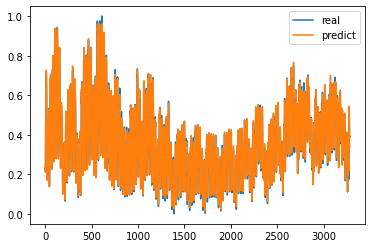

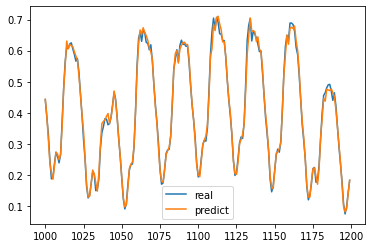

In [12]:
plt.plot(range(len(test_label_data)), test_label_data[:,0], label='real')
plt.plot(range(len(predict)), predict[:,0], label='predict')
plt.legend() 
plt.show()

plt.plot(range(1000,1200), test_label_data[1000:1200,0], label='real')
plt.plot(range(1000,1200), predict[1000:1200,0], label='predict')
plt.legend() 
plt.show()

In [13]:
predict = predict.reshape(-1, 1)
test_label_data = test_label_data.reshape(-1, 1)

reversePredict = scaler.inverse_transform(predict)
reverseLabel = scaler.inverse_transform(test_label_data)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    return np.mean(np.abs((y_true - y_pred)/y_true))

t = mean_absolute_percentage_error(reverseLabel, reversePredict)
print(t)

0.00848491
